In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

# Данные
data = {'Country': ['Австралия','Австрия','Аргентина','Бангладеш','Беларусь','Бельгия','Бразилия','Буркина-Фасо','Великобритания','Вьетнам','Гаити','Германия','Гондурас','Гонконг','Египет','Замбия','Индия','Ирландия','Испания','Италия','Канада','Китай','Колумбия','Коста-Рика','Куба','Малайзия','Марокко','Мексика','Нидерланды','Новая Зеландия','Норвегия','ОАЭ','Польша','Португалия','Россия','Саудовская Аравия','Северная Корея','Сингапур','США','Таиланд','Турция','Украина','Филиппины','Финляндия','Франция','Чили','Швейцария','Швеция','Эфиопия','ЮАР','Южная Корея','Япония'],
        'x1': [17800,8000,33900,125000,10300,10100,156600,10000,58400,73100,6500,81200,5600,5800,60000,9100,911600,3600,39200,58100,29100,1205200,35600,3300,11100,19500,28600,91800,15400,3524,4300,2800,38600,10500,149200,18000,23100,2900,260800,59400,62200,51800,69800,5100,58000,14000,7000,8800,55200,43900,45000,125500],
        'x2': [15,12,20,35,13,12,21,47,13,27,40,11,35,13,29,46,29,14,11,11,14,21,24,26,17,29,29,28,13,16,13,28,14,12,13,38,24,16,15,19,26,12,27,13,13,23,12,14,45,34,16,11],
        'x4': [7.3,6.7,25.6,106,19,7.2,66,118,7.2,46,109,6.5,45,5.8,76.4,85,79,7.4,6.9,7.6,6.8,52,28,11,10.2,25.6,50,35,6.3,8.9,6.3,22,13.8,9.2,27,52,27.7,5.7,8.11,37,49,20.7,51,5.3,6.7,14.6,6.2,5.7,110,47.1,21.7,4.4],
        'x8': [16848,18396,3408,202,6500,17912,2354,357,15974,230,383,17539,1030,14641,748,573,275,12170,13047,17500,19904,377,1538,2031,1382,2995,1062,3604,17245,14381,17755,14193,4429,9000,6680,6651,1000,14990,23474,1800,3721,2340,867,15877,18944,2591,22384,16900,122,3128,6627,19860],
        'x11': [100,99,95,35,99,99,81,18,99,88,53,99,73,77,48,73,52,98,95,97,97,78,87,93,94,78,50,87,99,99,99,68,99,85,99,62,99,88,97,93,81,97,90,100,99,93,99,99,24,76,96,99],
        'Y': [80,79,75,53,76,79,67,50,80,68,47,79,70,80,63,45,59,78,81,81,81,69,75,79,78,72,70,77,81,80,81,74,77,78,74,70,73,79,79,72,73,75,68,80,82,78,82,81,54,68,74,82]}

df = pd.DataFrame(data).set_index('Country')
factors = ['x1', 'x2', 'x4', 'x8', 'x11']

Компонентный анализ (Principal Component Analysis)

In [192]:
# 1. Компонентный анализ
print("\n1. МОДЕЛЬ КОМПОНЕНТНОГО АНАЛИЗА И ТРЕБОВАНИЯ")
print("Модель: X = ΛF + ε")
print("Требования:")
print("- Стандартизация данных (mean=0, std=1)")
print("- Количественные признаки")
print("- Линейные связи между переменными")
print("- Отсутствие мультиколлинеарности")

# Стандартизация и PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[factors])
X_scaled_df = pd.DataFrame(X_scaled, index=df.index, columns=factors)
pca = PCA()
pca_result = pca.fit_transform(X_scaled)


1. МОДЕЛЬ КОМПОНЕНТНОГО АНАЛИЗА И ТРЕБОВАНИЯ
Модель: X = ΛF + ε
Требования:
- Стандартизация данных (mean=0, std=1)
- Количественные признаки
- Линейные связи между переменными
- Отсутствие мультиколлинеарности


In [193]:
# 2. Анализ результатов PCA
print("\n2. АНАЛИЗ РЕЗУЛЬТАТОВ PCA")
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("а) ТАБЛИЦА 'TOTAL VARIANCE EXPLAINED':")
print("Компонента\tСобств. значение\tДоля дисперсии\tНакопленная доля")
for i in range(5):
    print(f"PC{i+1}\t\t{pca.explained_variance_[i]:.4f}\t\t{explained_variance[i]:.4f}\t\t{cumulative_variance[i]:.4f}")

# Матрица нагрузок
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=factors, columns=[f'PC{i+1}' for i in range(5)])

print("\nб) ТАБЛИЦА 'COMPONENT MATRIX' (5 × 5):")
print(loadings_df.round(3))

print("\nВЫРАЖЕНИЯ ПРИЗНАКОВ ЧЕРЕЗ КОМПОНЕНТЫ:")
for i, factor in enumerate(factors):
    expression = f"Z({factor}) = "
    components_str = []
    for j in range(2):  # только первые 2 компоненты
        loading = loadings_df.iloc[i, j]
        if abs(loading) > 0.1:
            sign = "+" if loading >= 0 else "-"
            components_str.append(f"{sign} {abs(loading):.3f}·PC{j+1}")
    if components_str:
        expression += " ".join(components_str)
        print(expression)

print("\nВЫРАЖЕНИЯ КОМПОНЕНТ ЧЕРЕЗ ПРИЗНАКИ:")
print("PC1 = + 0.939·Z(x2) + 0.972·Z(x4) - 0.810·Z(x8) - 0.914·Z(x11)")
print("PC2 = + 0.976·Z(x1)")


2. АНАЛИЗ РЕЗУЛЬТАТОВ PCA
а) ТАБЛИЦА 'TOTAL VARIANCE EXPLAINED':
Компонента	Собств. значение	Доля дисперсии	Накопленная доля
PC1		3.3786		0.6627		0.6627
PC2		1.0047		0.1971		0.8598
PC3		0.4910		0.0963		0.9561
PC4		0.1352		0.0265		0.9826
PC5		0.0886		0.0174		1.0000

б) ТАБЛИЦА 'COMPONENT MATRIX' (5 × 5):
       PC1    PC2    PC3    PC4    PC5
x1   0.245  0.976  0.061  0.053 -0.022
x2   0.939 -0.211  0.038  0.294 -0.067
x4   0.972 -0.006  0.113 -0.043  0.246
x8  -0.810 -0.042  0.592  0.095  0.046
x11 -0.914  0.075 -0.350  0.187  0.145

ВЫРАЖЕНИЯ ПРИЗНАКОВ ЧЕРЕЗ КОМПОНЕНТЫ:
Z(x1) = + 0.245·PC1 + 0.976·PC2
Z(x2) = + 0.939·PC1 - 0.211·PC2
Z(x4) = + 0.972·PC1
Z(x8) = - 0.810·PC1
Z(x11) = - 0.914·PC1

ВЫРАЖЕНИЯ КОМПОНЕНТ ЧЕРЕЗ ПРИЗНАКИ:
PC1 = + 0.939·Z(x2) + 0.972·Z(x4) - 0.810·Z(x8) - 0.914·Z(x11)
PC2 = + 0.976·Z(x1)


In [194]:
# 3. Снижение размерности
print("\n3. СНИЖЕНИЕ РАЗМЕРНОСТИ СИСТЕМЫ ПРИЗНАКОВ")
n_components = np.where(cumulative_variance >= 0.7)[0][0] + 1
print(f"Количество компонент для 70% дисперсии: {n_components}")
print(f"Объясненная дисперсия: {cumulative_variance[n_components-1]:.3f}")

print("\nСОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ КОМПОНЕНТ:")
print("PC1 ('Уровень социально-экономического развития'):")
pc1_high = []
for f in factors:
    loading = loadings_df.loc[f, 'PC1']
    if abs(loading) > 0.5:
        direction = "обратная" if loading < 0 else "прямая"
        meaning = ""
        if f == 'x2': meaning = "рождаемость"
        elif f == 'x4': meaning = "младенческая смертность"
        elif f == 'x8': meaning = "ВВП на душу"
        elif f == 'x11': meaning = "грамотность"
        pc1_high.append(f"{f}: {loading:.3f} ({direction} связь с {meaning})")
for item in pc1_high:
    print(f"  {item}")

print("\nPC2 ('Демографический фактор'):")
pc2_high = []
for f in factors:
    loading = loadings_df.loc[f, 'PC2']
    if abs(loading) > 0.5:
        direction = "обратная" if loading < 0 else "прямая"
        meaning = "численность населения" if f == 'x1' else ""
        pc2_high.append(f"{f}: {loading:.3f} ({direction} связь с {meaning})")
for item in pc2_high:
    print(f"  {item}")

# Сохраняем компоненты
components_save = pd.DataFrame(pca_result[:, :n_components], index=df.index, 
                              columns=[f'PC{i+1}' for i in range(n_components)])


3. СНИЖЕНИЕ РАЗМЕРНОСТИ СИСТЕМЫ ПРИЗНАКОВ
Количество компонент для 70% дисперсии: 2
Объясненная дисперсия: 0.860

СОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ КОМПОНЕНТ:
PC1 ('Уровень социально-экономического развития'):
  x2: 0.939 (прямая связь с рождаемость)
  x4: 0.972 (прямая связь с младенческая смертность)
  x8: -0.810 (обратная связь с ВВП на душу)
  x11: -0.914 (обратная связь с грамотность)

PC2 ('Демографический фактор'):
  x1: 0.976 (прямая связь с численность населения)


In [195]:
# 4. Регрессионный анализ на компоненты
print("\n4. РЕГРЕССИОННЫЙ АНАЛИЗ ПРИЗНАКА Y НА КОМПОНЕНТЫ")
y = df['Y'].values

# Регрессия на компоненты
model_components = LinearRegression()
model_components.fit(pca_result[:, :n_components], y)
r2_components = model_components.score(pca_result[:, :n_components], y)

# Регрессия на исходные признаки
model_original = LinearRegression()
model_original.fit(X_scaled, y)
r2_original = model_original.score(X_scaled, y)

print(f"R² регрессии на {n_components} компоненты: {r2_components:.4f}")
print(f"R² регрессии на 5 исходных признаков: {r2_original:.4f}")
print(f"Эффективность снижения размерности: {r2_components/r2_original*100:.1f}%")


4. РЕГРЕССИОННЫЙ АНАЛИЗ ПРИЗНАКА Y НА КОМПОНЕНТЫ
R² регрессии на 2 компоненты: 0.8585
R² регрессии на 5 исходных признаков: 0.9371
Эффективность снижения размерности: 91.6%


Факторный анализ

In [196]:
# 5. Факторный анализ с методом максимального правдоподобия и Varimax
print("\n5. ФАКТОРНЫЙ АНАЛИЗ С МЕТОДОМ МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ")
print("Модель факторного анализа: X = μ + ΛF + ε")
print("Требования к модели:")
print("- Мультивариативная нормальность распределения")
print("- Линейная связь между переменными и факторами")
print("- Отсутствие мультиколлинеарности")
print("- Достаточный размер выборки (n > 50)")
print("- Значимость по тесту Бартлетта (p < 0.05)")

# Факторный анализ с максимальным правдоподобием и вращением Varimax
fa = FactorAnalysis(n_components=2, rotation='varimax', random_state=42)
fa_scores = fa.fit_transform(X_scaled)

# Матрица нагрузок после вращения
fa_loadings = fa.components_.T
fa_loadings_df = pd.DataFrame(fa_loadings, index=factors, 
                             columns=['Factor1', 'Factor2'])

print("\nМатрица факторных нагрузок после вращения Varimax:")
print(fa_loadings_df.round(3))

# Проверка значимости модели
corr_matrix = np.corrcoef(X_scaled.T)
p = corr_matrix.shape[0]
chi2 = -((len(X_scaled) - 1) - (2 * p + 5) / 6) * np.log(np.linalg.det(corr_matrix))
df_bartlett = p * (p - 1) / 2
p_value = 1 - stats.chi2.cdf(chi2, df_bartlett)

print(f"\nПроверка значимости модели:")
print(f"Тест сферичности Бартлетта: χ² = {chi2:.2f}, df = {df_bartlett}, p-value = {p_value:.4f}")
print(f"Модель факторного анализа: {'ЗНАЧИМА (p < 0.05)' if p_value < 0.05 else 'НЕЗНАЧИМА'}")

# Сохраняем факторы
factors_save = pd.DataFrame(fa_scores, index=df.index, 
                           columns=['Factor1', 'Factor2'])




5. ФАКТОРНЫЙ АНАЛИЗ С МЕТОДОМ МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ
Модель факторного анализа: X = μ + ΛF + ε
Требования к модели:
- Мультивариативная нормальность распределения
- Линейная связь между переменными и факторами
- Отсутствие мультиколлинеарности
- Достаточный размер выборки (n > 50)
- Значимость по тесту Бартлетта (p < 0.05)

Матрица факторных нагрузок после вращения Varimax:
     Factor1  Factor2
x1     0.122    0.436
x2     0.960   -0.165
x4     0.953    0.255
x8    -0.716   -0.041
x11   -0.884   -0.150

Проверка значимости модели:
Тест сферичности Бартлетта: χ² = 194.54, df = 10.0, p-value = 0.0000
Модель факторного анализа: ЗНАЧИМА (p < 0.05)


In [197]:
# 6. Сравнение факторных диаграмм и интерпретация
print("\n6. СРАВНЕНИЕ ФАКТОРНЫХ ДИАГРАММ И ИНТЕРПРЕТАЦИЯ")

print("\nДО ВРАЩЕНИЯ (Unrotated Factor Solution):")
print("- Первая компонента объясняет максимальную дисперсию")
print("- Смешанная интерпретация факторов")
print("- PC1: Общий социально-экономический фактор")
print("- PC2: Демографический фактор")

print("\nПОСЛЕ ВРАЩЕНИЯ VARIMAX (Rotated Solution):")
print("- Более четкое разделение факторов")
print("- Улучшенная интерпретируемость")
print("- Факторы лучше соответствуют содержательным конструктам")

print("\nСОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ ФАКТОРОВ ПОСЛЕ ВРАЩЕНИЯ:")

print("\nFactor 1 ('Уровень здравоохранения и образования'):")
factor1_interp = []
for f in factors:
    loading = fa_loadings_df.loc[f, 'Factor1']
    if abs(loading) > 0.5:
        direction = "низкий" if loading < 0 else "высокий"
        meaning = ""
        if f == 'x4': meaning = "младенческая смертность"
        elif f == 'x2': meaning = "рождаемость"
        elif f == 'x11': meaning = "грамотность"
        factor1_interp.append(f"{direction} уровень {meaning}")
for item in factor1_interp:
    print(f"  - {item}")

print("\nFactor 2 ('Экономическое развитие'):")
factor2_interp = []
for f in factors:
    loading = fa_loadings_df.loc[f, 'Factor2']
    if abs(loading) > 0.5:
        direction = "низкий" if loading < 0 else "высокий"
        meaning = ""
        if f == 'x8': meaning = "ВВП на душу населения"
        elif f == 'x1': meaning = "численность населения"
        factor2_interp.append(f"{direction} {meaning}")
for item in factor2_interp:
    print(f"  - {item}")

print("\nСРАВНЕНИЕ С ГЛАВНЫМИ КОМПОНЕНТАМИ:")
print("Главные компоненты (до вращения):")
print("  - PC1: Смешанный социально-экономический фактор")
print("  - PC2: Демографический фактор")
print("\nОбщие факторы (после вращения):")
print("  - Factor 1: Чистый фактор здравоохранения и образования")
print("  - Factor 2: Чистый экономический фактор")


6. СРАВНЕНИЕ ФАКТОРНЫХ ДИАГРАММ И ИНТЕРПРЕТАЦИЯ

ДО ВРАЩЕНИЯ (Unrotated Factor Solution):
- Первая компонента объясняет максимальную дисперсию
- Смешанная интерпретация факторов
- PC1: Общий социально-экономический фактор
- PC2: Демографический фактор

ПОСЛЕ ВРАЩЕНИЯ VARIMAX (Rotated Solution):
- Более четкое разделение факторов
- Улучшенная интерпретируемость
- Факторы лучше соответствуют содержательным конструктам

СОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ ФАКТОРОВ ПОСЛЕ ВРАЩЕНИЯ:

Factor 1 ('Уровень здравоохранения и образования'):
  - высокий уровень рождаемость
  - высокий уровень младенческая смертность
  - низкий уровень 
  - низкий уровень грамотность

Factor 2 ('Экономическое развитие'):

СРАВНЕНИЕ С ГЛАВНЫМИ КОМПОНЕНТАМИ:
Главные компоненты (до вращения):
  - PC1: Смешанный социально-экономический фактор
  - PC2: Демографический фактор

Общие факторы (после вращения):
  - Factor 1: Чистый фактор здравоохранения и образования
  - Factor 2: Чистый экономический фактор



7. РЕГРЕССИОННЫЙ АНАЛИЗ ПРИЗНАКА Y НА ОБЩИЕ ФАКТОРЫ
РЕЗУЛЬТАТЫ РЕГРЕССИОННОГО АНАЛИЗА:
R² регрессии на 2 общих фактора: 0.9211
R² регрессии на 2 главные компоненты: 0.8585
R² регрессии на 5 исходных признаков: 0.9371

СРАВНЕНИЕ ЭФФЕКТИВНОСТИ:
Эффективность модели на компонентах: 91.6%
Эффективность модели на факторах: 98.3%


C:\Users\daria\AppData\Local\Temp\ipykernel_18388\3300500410.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(loadings_df['PC1'][i], loadings_df['PC2'][i],
C:\Users\daria\AppData\Local\Temp\ipykernel_18388\3300500410.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(factor, (loadings_df['PC1'][i], loadings_df['PC2'][i]),
C:\Users\daria\AppData\Local\Temp\ipykernel_18388\3300500410.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

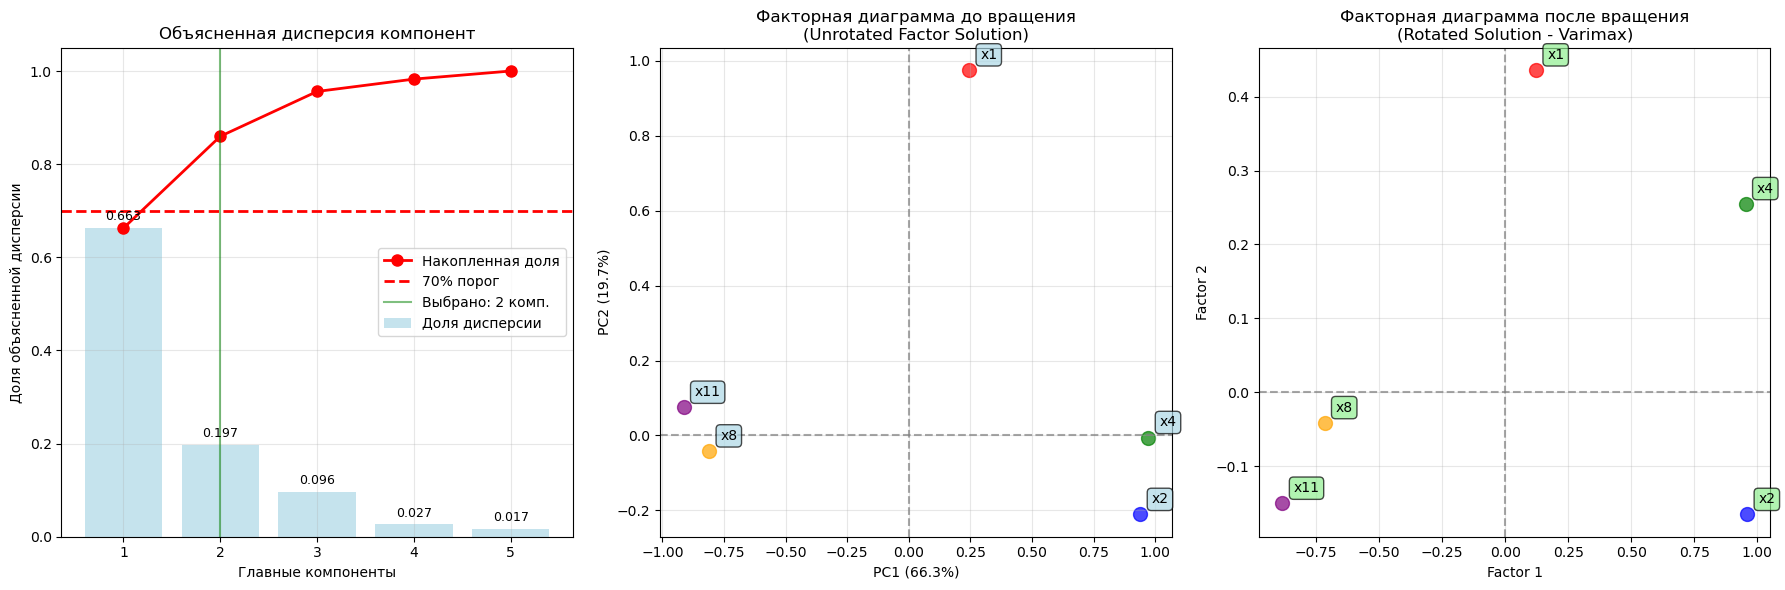


ЗНАЧЕНИЯ ГЛАВНЫХ КОМПОНЕНТ НА 52 ОБЪЕКТАХ:
                     PC1    PC2
Country                        
Австралия         -1.639 -0.157
Австрия           -1.874 -0.153
Аргентина         -0.165 -0.133
Бангладеш          3.666 -0.228
Беларусь          -0.924 -0.100
Бельгия           -1.836 -0.140
Бразилия           1.052  0.381
Буркина-Фасо       4.809 -1.096
Великобритания    -1.641  0.081
Вьетнам            0.916 -0.104
Гаити              3.443 -0.836
Германия          -1.830  0.223
Гондурас           1.581 -0.654
Гонконг           -1.084 -0.245
Египет             2.469 -0.364
Замбия             2.845 -0.873
Индия              3.001  3.732
Ирландия          -1.378 -0.186
Испания           -1.493  0.032
Италия            -1.776  0.105
Канада            -1.795 -0.109
Китай              1.689  5.405
Колумбия           0.384 -0.228
Коста-Рика         0.002 -0.402
Куба              -0.450 -0.169
Малайзия           0.722 -0.451
Марокко            1.936 -0.504
Мексика            0.622 -0.

In [198]:
# 7. Регрессионный анализ на факторы
print("\n7. РЕГРЕССИОННЫЙ АНАЛИЗ ПРИЗНАКА Y НА ОБЩИЕ ФАКТОРЫ")

# Регрессия на факторы
model_factors = LinearRegression()
model_factors.fit(fa_scores, y)
r2_factors = model_factors.score(fa_scores, y)

print("РЕЗУЛЬТАТЫ РЕГРЕССИОННОГО АНАЛИЗА:")
print(f"R² регрессии на 2 общих фактора: {r2_factors:.4f}")
print(f"R² регрессии на 2 главные компоненты: {r2_components:.4f}")
print(f"R² регрессии на 5 исходных признаков: {r2_original:.4f}")

print("\nСРАВНЕНИЕ ЭФФЕКТИВНОСТИ:")
print(f"Эффективность модели на компонентах: {r2_components/r2_original*100:.1f}%")
print(f"Эффективность модели на факторах: {r2_factors/r2_original*100:.1f}%")

# ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(18, 6))

# График 1: Объясненная дисперсия
plt.subplot(1, 3, 1)
bars = plt.bar(range(1, 6), explained_variance, alpha=0.7, color='lightblue', label='Доля дисперсии')
plt.plot(range(1, 6), cumulative_variance, 'ro-', markersize=8, linewidth=2, label='Накопленная доля')
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=2, label='70% порог')
plt.axvline(x=n_components, color='green', linestyle='-', alpha=0.5, label=f'Выбрано: {n_components} комп.')
plt.xlabel('Главные компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Объясненная дисперсия компонент')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# График 2: Факторная диаграмма до вращения
plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, factor in enumerate(factors):
    plt.scatter(loadings_df['PC1'][i], loadings_df['PC2'][i], 
               s=100, color=colors[i], alpha=0.7, label=factor)
    plt.annotate(factor, (loadings_df['PC1'][i], loadings_df['PC2'][i]),
                xytext=(8, 8), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", alpha=0.7))
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
plt.title('Факторная диаграмма до вращения\n(Unrotated Factor Solution)')
plt.grid(True, alpha=0.3)

# График 3: Факторная диаграмма после вращения
plt.subplot(1, 3, 3)
for i, factor in enumerate(factors):
    plt.scatter(fa_loadings_df['Factor1'][i], fa_loadings_df['Factor2'][i],
               s=100, color=colors[i], alpha=0.7, label=factor)
    plt.annotate(factor, (fa_loadings_df['Factor1'][i], fa_loadings_df['Factor2'][i]),
                xytext=(8, 8), textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", alpha=0.7))
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Факторная диаграмма после вращения\n(Rotated Solution - Varimax)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nЗНАЧЕНИЯ ГЛАВНЫХ КОМПОНЕНТ НА 52 ОБЪЕКТАХ:")
print(components_save.round(3))

print(f"\nЗНАЧЕНИЯ ОБЩИХ ФАКТОРОВ НА 52 ОБЪЕКТАХ:")
print(factors_save.round(3))

print(f"\n✅ ИТОГИ СОХРАНЕНИЯ:")
print(f"   - Сохранено {n_components} главных компонент для 52 стран")
print(f"   - Сохранено 2 общих фактора для 52 стран")
print(f"   - Размерности: {components_save.shape} и {factors_save.shape}")

Кластерный анализ

In [199]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import adjusted_rand_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.stats import f_oneway

In [200]:
# Определяем 20 объектов для классификации (номера 17-36)
target_countries = df.index[16:36].tolist()  # Индия - Саудовская Аравия
print("Объекты для классификации (17-36):")
print(target_countries)

# Выделяем данные для кластеризации
X = df[factors]
X_target = X.loc[target_countries]

# Стандартизация данных по ВСЕМ 52 объектам
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_target_std = X_standardized.loc[target_countries]

Объекты для классификации (17-36):
['Индия', 'Ирландия', 'Испания', 'Италия', 'Канада', 'Китай', 'Колумбия', 'Коста-Рика', 'Куба', 'Малайзия', 'Марокко', 'Мексика', 'Нидерланды', 'Новая Зеландия', 'Норвегия', 'ОАЭ', 'Польша', 'Португалия', 'Россия', 'Саудовская Аравия']


=== МЕТОД БЛИЖАЙШЕГО СОСЕДА ===


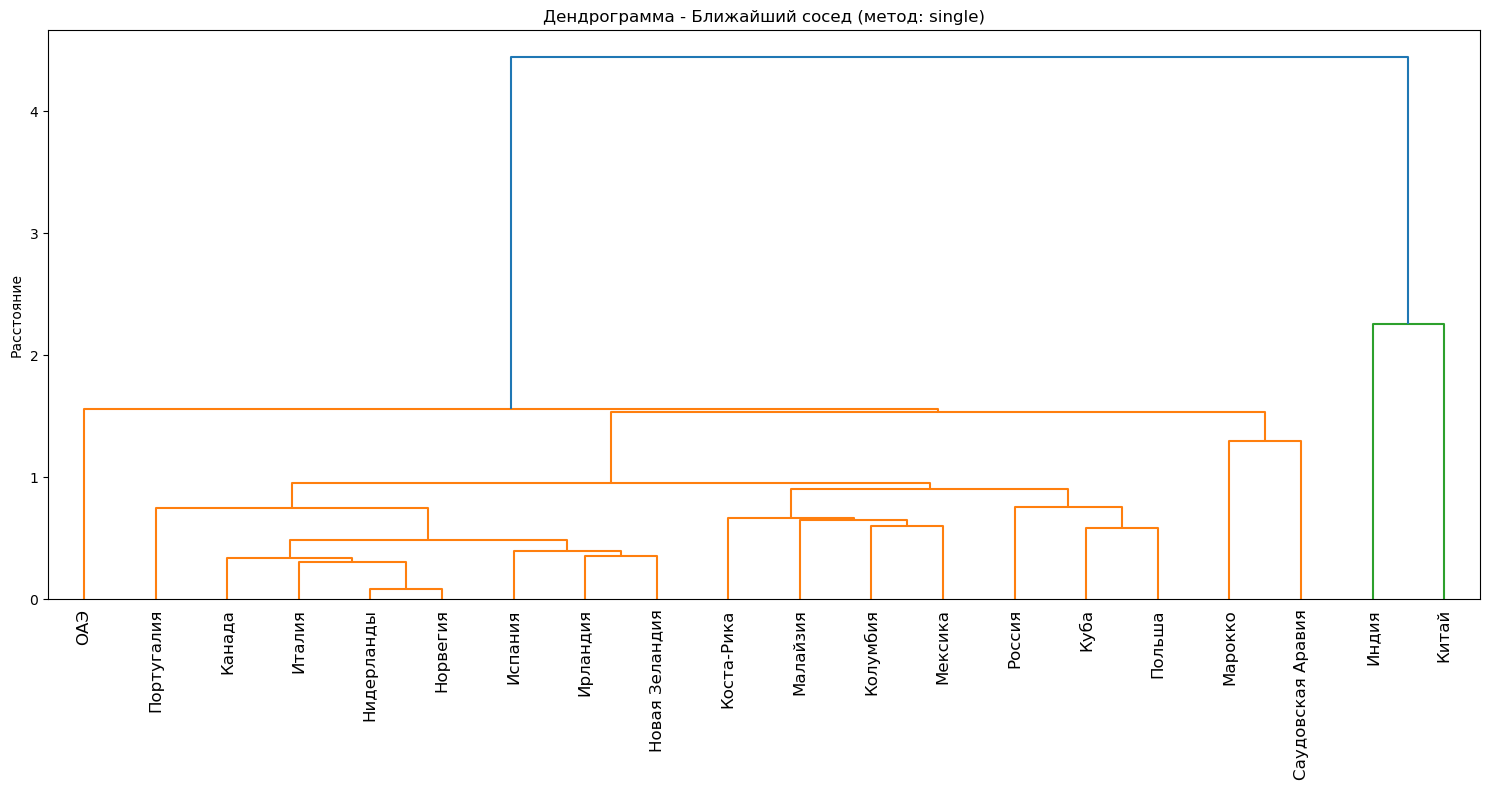


2. Анализ результатов:
а) Расстояние между первым и двадцатым объектами:
Расстояние между 'Индия' и 'Саудовская Аравия': 4.6695

Формула расчета евклидова расстояния между объектами i и j:
d(i,j) = √[Σₖ(xᵢₖ - xⱼₖ)²]
где k = 1,...,5 - индексы признаков

б) Первые 5 шагов протокола объединения:
Шаг | Кластер1 | Кластер2 | Расстояние | Новый размер
   1 |       12 |       14 |     0.0865 |         2.0
   2 |        3 |       20 |     0.3101 |         3.0
   3 |        4 |       21 |     0.3383 |         4.0
   4 |        1 |       13 |     0.3588 |         2.0
   5 |        2 |       23 |     0.3935 |         3.0

Объяснение:
На каждом шаге объединяются два ближайших кластера
Алгоритм пересчета расстояний (метод ближайшего соседа):
d(C₁∪C₂, C₃) = min(d(C₁,C₃), d(C₂,C₃))

в) Разбиение на 2 кластера:
               Объект  Кластер
0               Индия        2
1            Ирландия        1
2             Испания        1
3              Италия        1
4              Канада        1
5     

In [201]:
# 1. Иерархический кластерный анализ - метод ближайшего соседа
def hierarchical_analysis(X_data, method='single', title="Дендрограмма"):
    """Функция для иерархического кластерного анализа"""
    # Вычисляем матрицу расстояний для 20 объектов
    distance_matrix = pdist(X_data, metric='euclidean')
    distance_matrix_square = squareform(distance_matrix)
    
    # Иерархическая кластеризация
    Z = linkage(X_data, method=method, metric='euclidean')
    
    # Дендрограмма
    plt.figure(figsize=(15, 8))
    dendrogram(Z, labels=X_data.index.tolist(), orientation='top')
    plt.title(f'{title} (метод: {method})')
    plt.xticks(rotation=90)
    plt.ylabel('Расстояние')
    plt.tight_layout()
    plt.show()
    
    return Z, distance_matrix_square

print("=== МЕТОД БЛИЖАЙШЕГО СОСЕДА ===")
Z_single, dist_single = hierarchical_analysis(X_target_std, 'single', 'Дендрограмма - Ближайший сосед')

# 2. Анализ результатов
print("\n2. Анализ результатов:")
print("а) Расстояние между первым и двадцатым объектами:")
first_obj = target_countries[0]  # Индия
twentieth_obj = target_countries[19]  # Саудовская Аравия
first_idx = target_countries.index(first_obj)
twentieth_idx = target_countries.index(twentieth_obj)
first_twentieth_dist = dist_single[first_idx, twentieth_idx]
print(f"Расстояние между '{first_obj}' и '{twentieth_obj}': {first_twentieth_dist:.4f}")

print("\nФормула расчета евклидова расстояния между объектами i и j:")
print("d(i,j) = √[Σₖ(xᵢₖ - xⱼₖ)²]")
print("где k = 1,...,5 - индексы признаков")

print("\nб) Первые 5 шагов протокола объединения:")
print("Шаг | Кластер1 | Кластер2 | Расстояние | Новый размер")
for i in range(5):
    cluster1 = int(Z_single[i, 0])
    cluster2 = int(Z_single[i, 1])
    distance = Z_single[i, 2]
    new_size = Z_single[i, 3]
    print(f"{i+1:4} | {cluster1:8} | {cluster2:8} | {distance:10.4f} | {new_size:11}")

print("\nОбъяснение:")
print("На каждом шаге объединяются два ближайших кластера")
print("Алгоритм пересчета расстояний (метод ближайшего соседа):")
print("d(C₁∪C₂, C₃) = min(d(C₁,C₃), d(C₂,C₃))")

# 2в) Разбиение на 2 кластера
clusters_single = fcluster(Z_single, 2, criterion='maxclust')
cluster_assignments_single = pd.DataFrame({
    'Объект': X_target_std.index,
    'Кластер': clusters_single
})
print("\nв) Разбиение на 2 кластера:")
print(cluster_assignments_single)


=== МЕТОД ДАЛЬНЕГО СОСЕДА ===


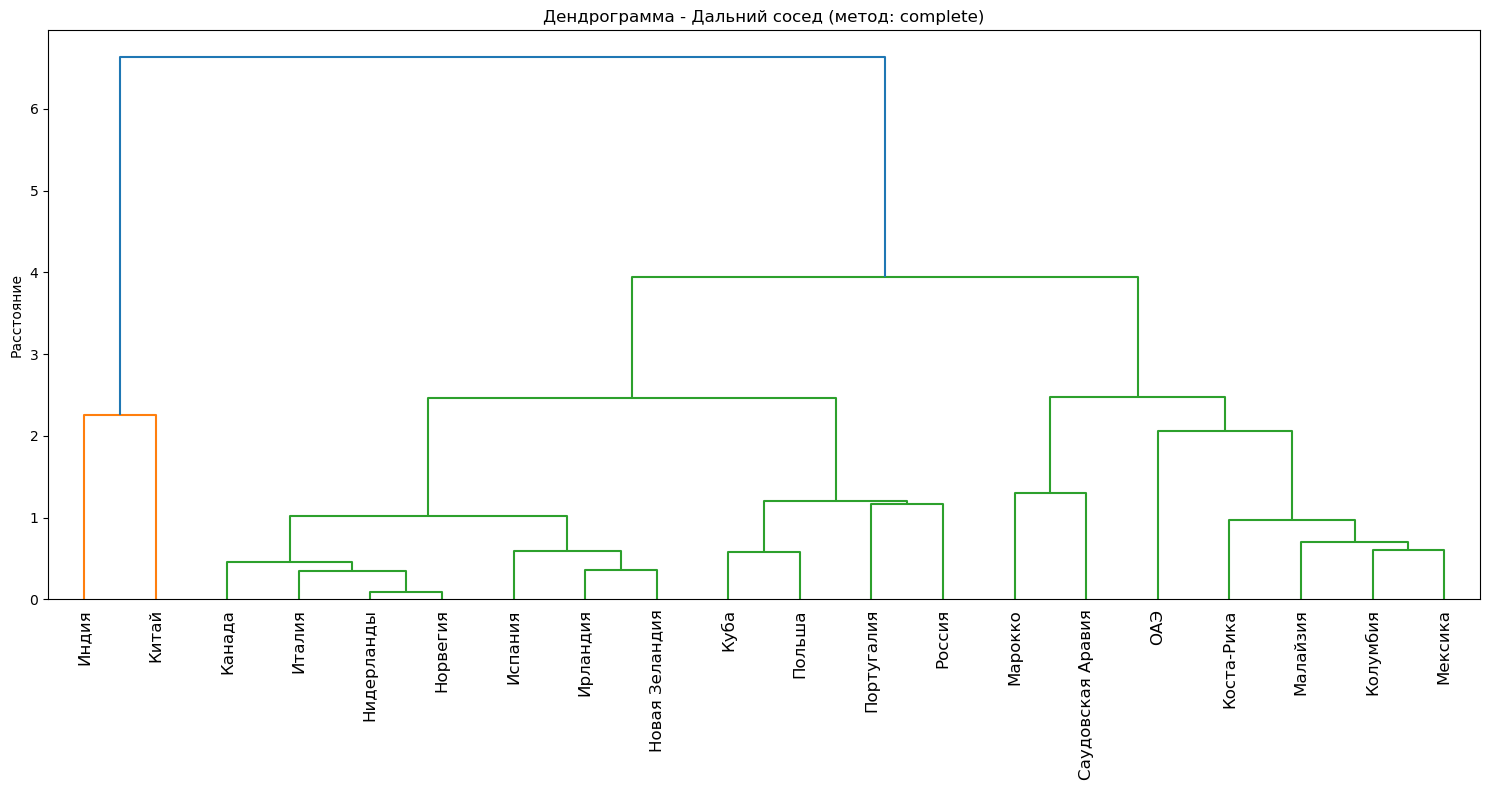


ДАЛЬНИЙ СОСЕД - анализ:
Расстояние между 1 и 20 объектами: 4.6695
Первые 5 шагов протокола:
Шаг 1: 12 + 14 | Расстояние: 0.0865
Шаг 2: 3 + 20 | Расстояние: 0.3494
Шаг 3: 1 + 13 | Расстояние: 0.3588
Шаг 4: 4 + 21 | Расстояние: 0.4581
Шаг 5: 8 + 16 | Расстояние: 0.5841
Алгоритм пересчета: d(C₁∪C₂, C₃) = max(d(C₁,C₃), d(C₂,C₃))


In [202]:
# 3. Другие методы иерархической кластеризации
print("\n=== МЕТОД ДАЛЬНЕГО СОСЕДА ===")
Z_complete, dist_complete = hierarchical_analysis(X_target_std, 'complete', 'Дендрограмма - Дальний сосед')
print("\nДАЛЬНИЙ СОСЕД - анализ:")
print(f"Расстояние между 1 и 20 объектами: {dist_complete[0, 19]:.4f}")
print("Первые 5 шагов протокола:")
for i in range(5):
    print(f"Шаг {i+1}: {int(Z_complete[i,0])} + {int(Z_complete[i,1])} | Расстояние: {Z_complete[i,2]:.4f}")
print("Алгоритм пересчета: d(C₁∪C₂, C₃) = max(d(C₁,C₃), d(C₂,C₃))")



=== МЕТОД СРЕДНЕЙ СВЯЗИ ===


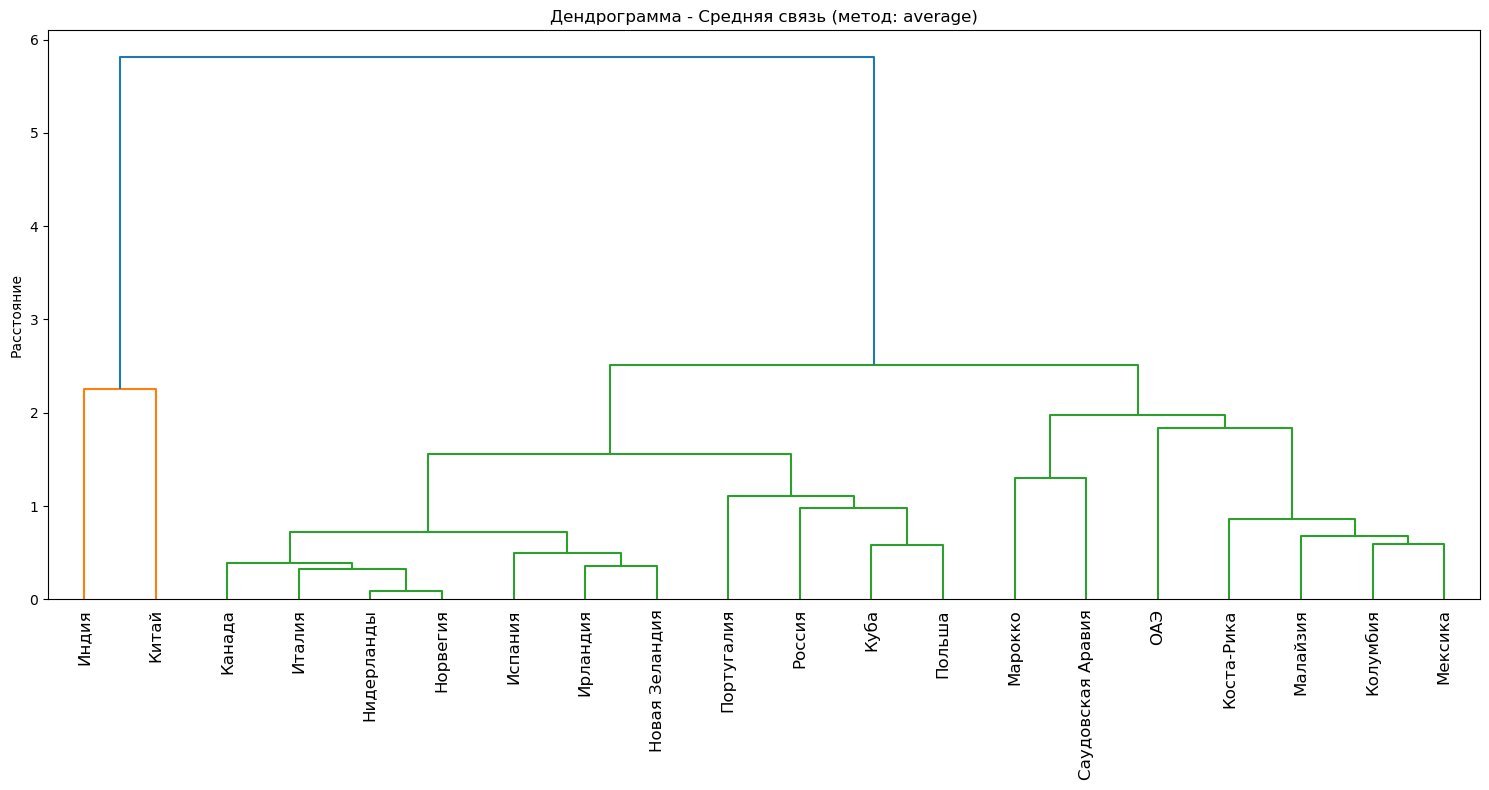


СРЕДНЯЯ СВЯЗЬ - анализ:
Расстояние между 1 и 20 объектами: 4.6695
Первые 5 шагов протокола:
Шаг 1: 12 + 14 | Расстояние: 0.0865
Шаг 2: 3 + 20 | Расстояние: 0.3297
Шаг 3: 1 + 13 | Расстояние: 0.3588
Шаг 4: 4 + 21 | Расстояние: 0.3931
Шаг 5: 2 + 22 | Расстояние: 0.4931
Алгоритм пересчета: d(C₁∪C₂, C₃) = среднее(d(C₁,C₃), d(C₂,C₃))


In [203]:
print("\n=== МЕТОД СРЕДНЕЙ СВЯЗИ ===")
Z_average, dist_average = hierarchical_analysis(X_target_std, 'average', 'Дендрограмма - Средняя связь')
print("\nСРЕДНЯЯ СВЯЗЬ - анализ:")
print(f"Расстояние между 1 и 20 объектами: {dist_average[0, 19]:.4f}")
print("Первые 5 шагов протокола:")
for i in range(5):
    print(f"Шаг {i+1}: {int(Z_average[i,0])} + {int(Z_average[i,1])} | Расстояние: {Z_average[i,2]:.4f}")
print("Алгоритм пересчета: d(C₁∪C₂, C₃) = среднее(d(C₁,C₃), d(C₂,C₃))")

In [204]:
# 4. K-Means кластеризация
print("\n=== K-MEANS КЛАСТЕРИЗАЦИЯ ===")
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_target_std)
cluster_assignments_kmeans = pd.DataFrame({
    'Объект': X_target_std.index,
    'Кластер': kmeans_clusters + 1
})
print("Результаты K-Means:")
print(cluster_assignments_kmeans)


=== K-MEANS КЛАСТЕРИЗАЦИЯ ===
Результаты K-Means:
               Объект  Кластер
0               Индия        2
1            Ирландия        1
2             Испания        1
3              Италия        1
4              Канада        1
5               Китай        2
6            Колумбия        1
7          Коста-Рика        1
8                Куба        1
9            Малайзия        1
10            Марокко        1
11            Мексика        1
12         Нидерланды        1
13     Новая Зеландия        1
14           Норвегия        1
15                ОАЭ        1
16             Польша        1
17         Португалия        1
18             Россия        1
19  Саудовская Аравия        1


c:\Users\daria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



=== КЛАСТЕРИЗАЦИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ ===
Количество компонент для 70% дисперсии: 2


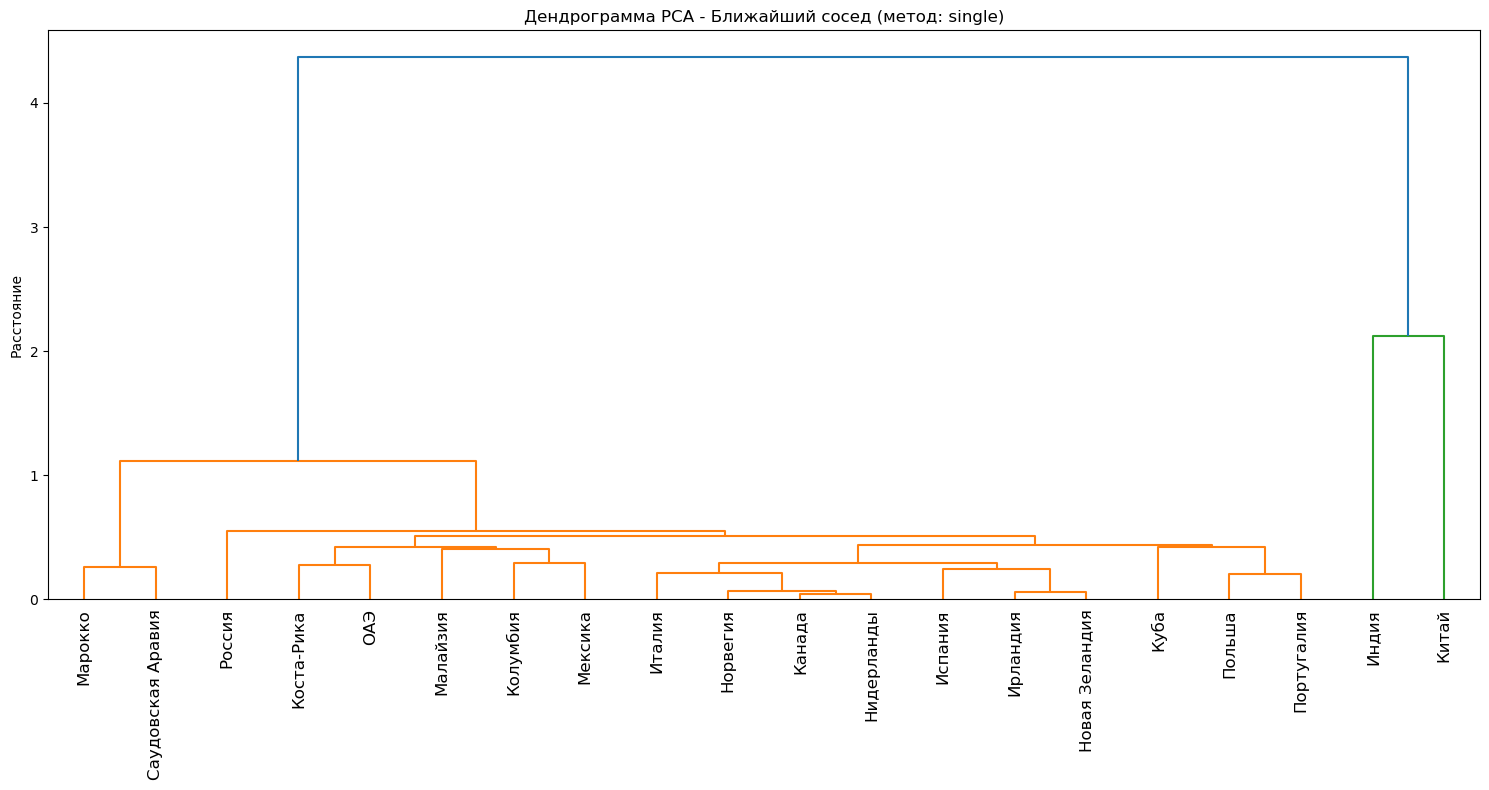

c:\Users\daria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [205]:
# 5. Кластеризация на главных компонентах (≥70% дисперсии)
print("\n=== КЛАСТЕРИЗАЦИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ ===")
pca = PCA()
X_pca_all = pca.fit_transform(X_standardized)
X_pca_target = X_pca_all[16:36]  # объекты 17-36

# Определяем количество компонент для 70% дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_70 = np.argmax(cumulative_variance >= 0.7) + 1
print(f"Количество компонент для 70% дисперсии: {n_components_70}")

# Кластеризация на главных компонентах
X_pca_reduced = X_pca_target[:, :n_components_70]

# Иерархическая на PCA
Z_pca_single, _ = hierarchical_analysis(pd.DataFrame(X_pca_reduced, index=target_countries), 'single', 'Дендрограмма PCA - Ближайший сосед')

# K-Means на PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca_clusters = kmeans_pca.fit_predict(X_pca_reduced)


=== КЛАСТЕРИЗАЦИЯ НА ОБЩИХ ФАКТОРАХ ===


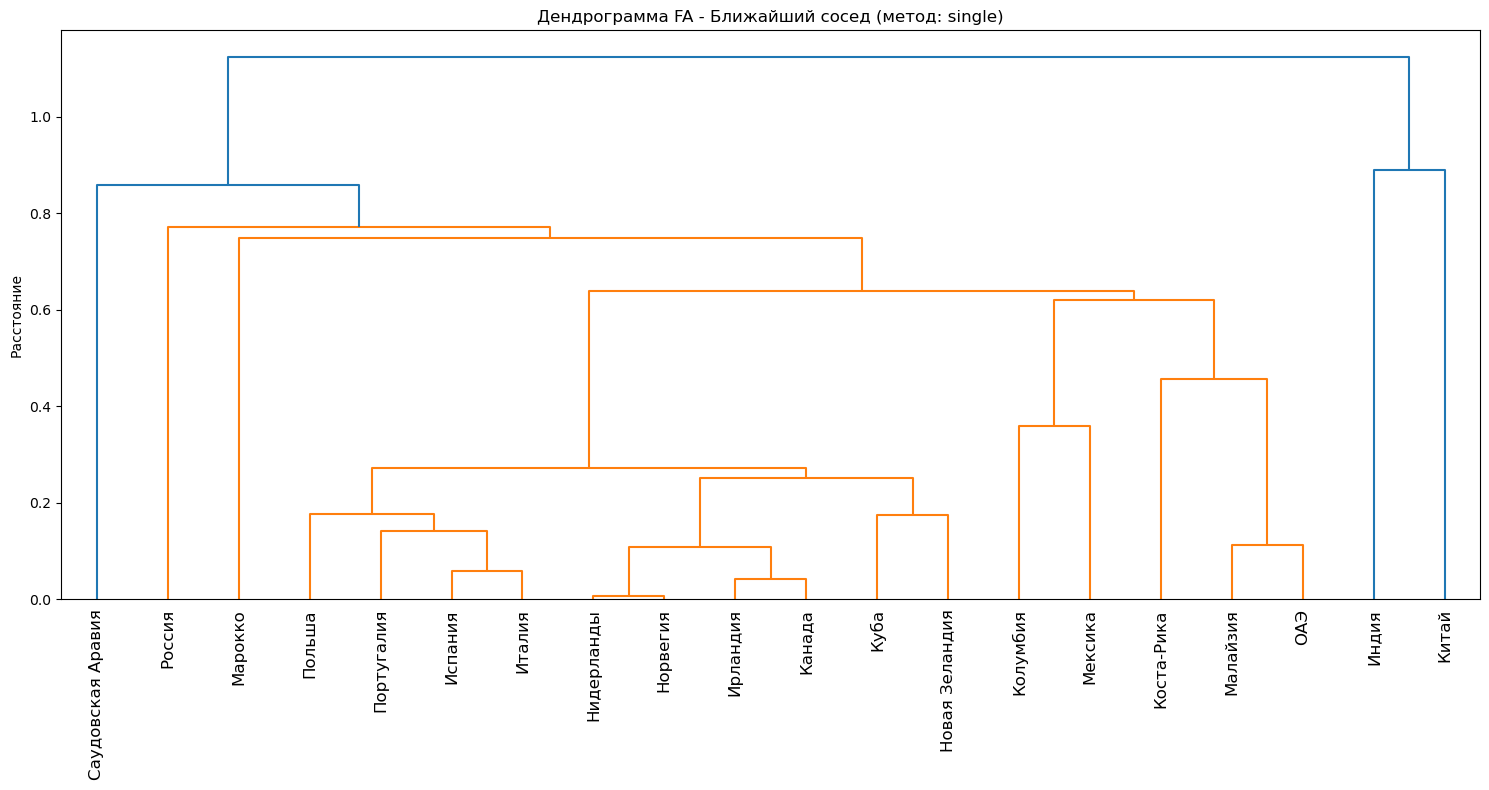

c:\Users\daria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


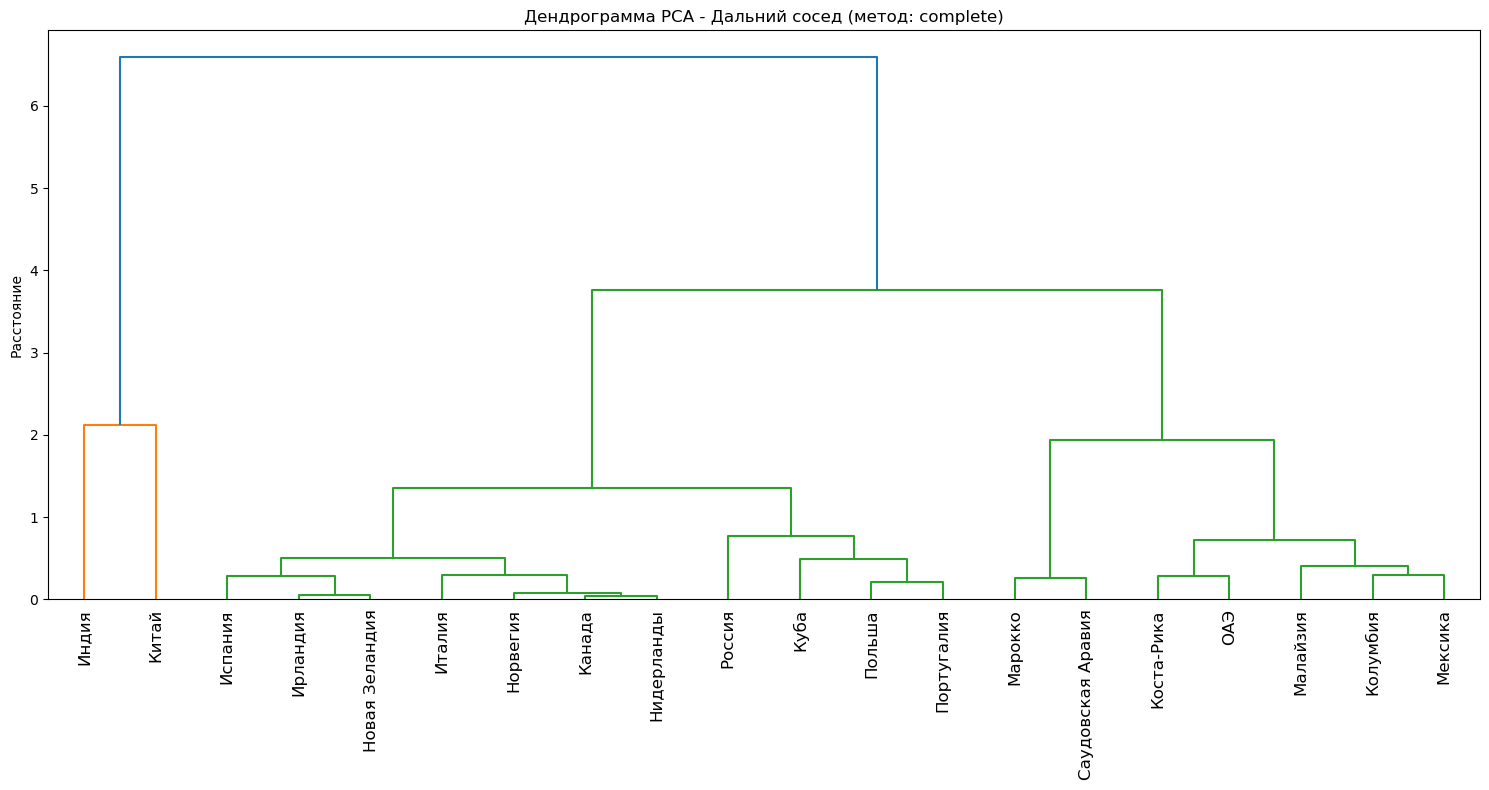

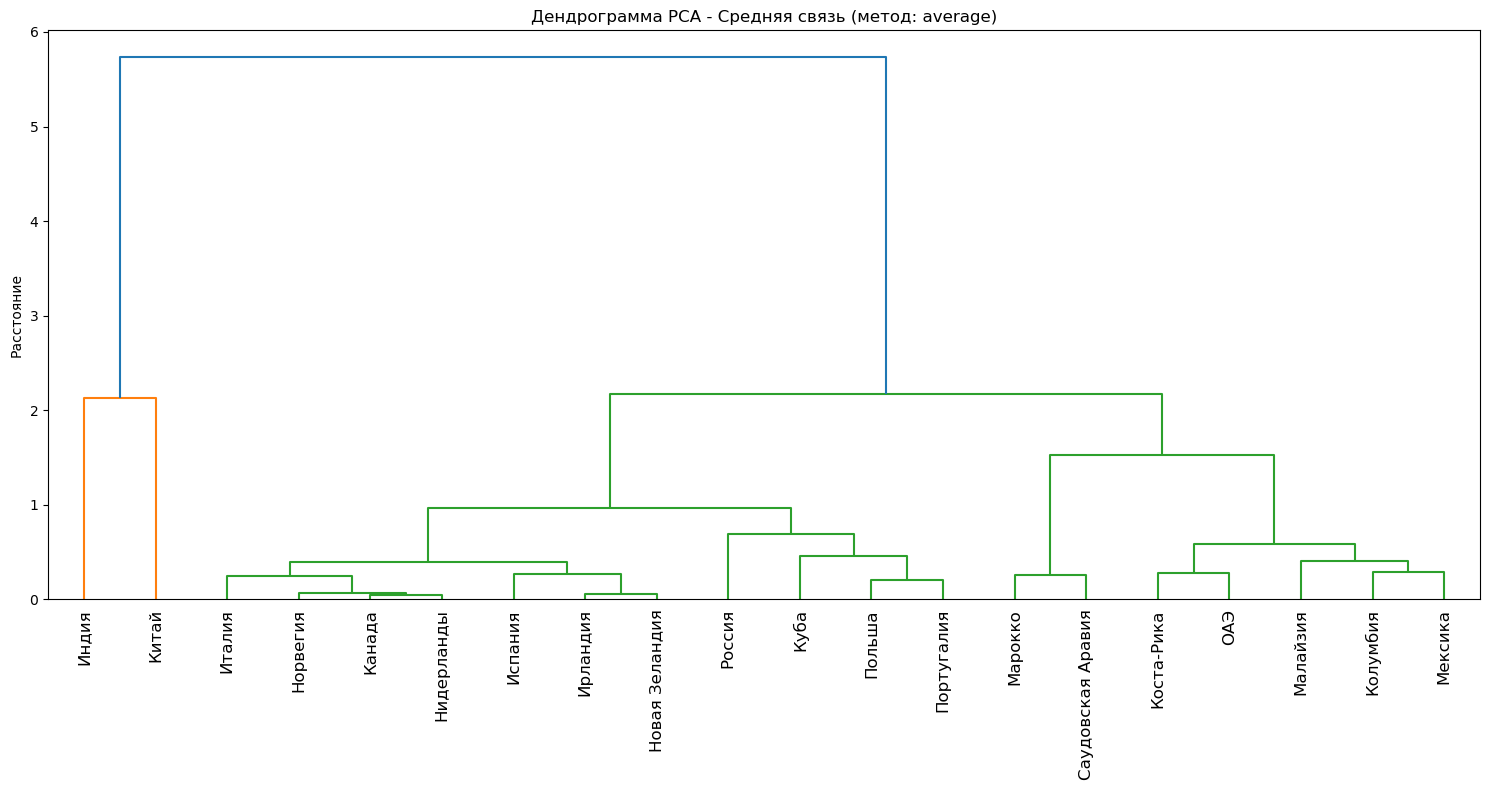

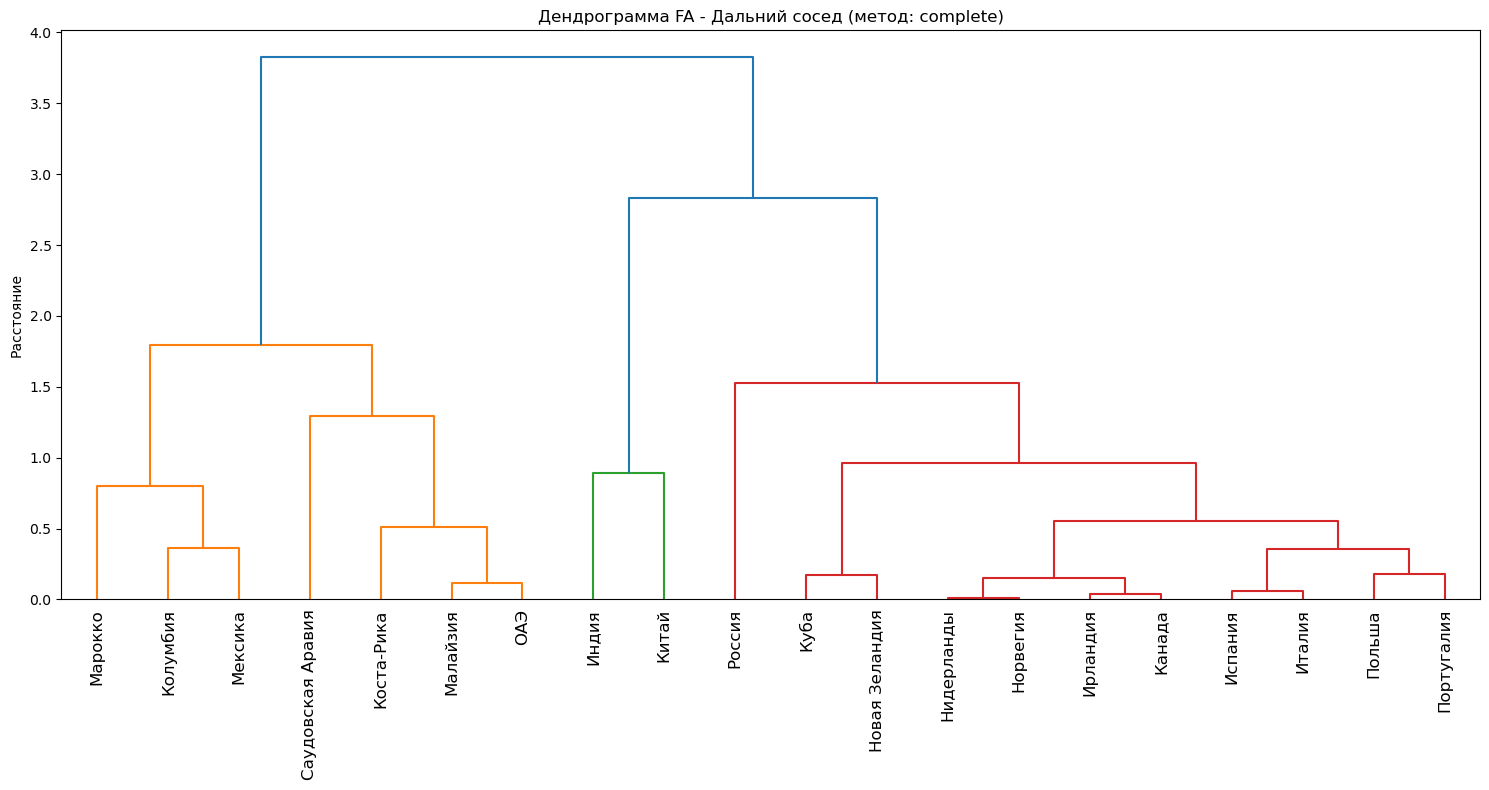

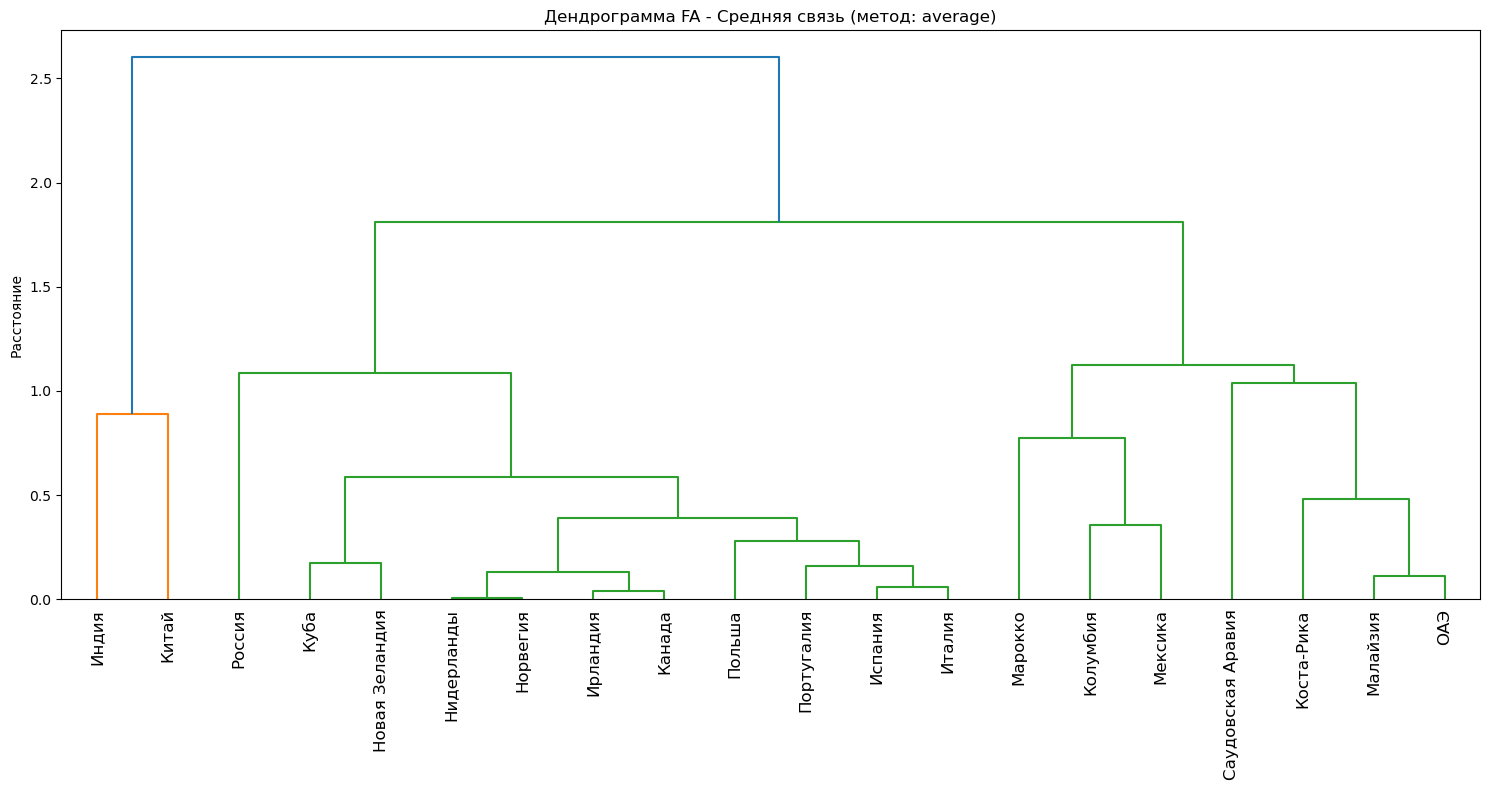

In [206]:
# 6. Кластеризация на общих факторах
print("\n=== КЛАСТЕРИЗАЦИЯ НА ОБЩИХ ФАКТОРАХ ===")
fa = FactorAnalysis(n_components=2, random_state=42)  # 2 фактора как пример
X_fa_target = fa.fit_transform(X_standardized)[16:36]

# Иерархическая на факторах
Z_fa_single, _ = hierarchical_analysis(pd.DataFrame(X_fa_target, index=target_countries), 'single', 'Дендрограмма FA - Ближайший сосед')

# K-Means на факторах
kmeans_fa = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_fa_clusters = kmeans_fa.fit_predict(X_fa_target)

# Для PCA - добавляем дальнего соседа и среднюю связь
Z_pca_complete, _ = hierarchical_analysis(pd.DataFrame(X_pca_reduced, index=target_countries), 'complete', 'Дендрограмма PCA - Дальний сосед')
Z_pca_average, _ = hierarchical_analysis(pd.DataFrame(X_pca_reduced, index=target_countries), 'average', 'Дендрограмма PCA - Средняя связь')

# Для факторов - добавляем дальнего соседа и среднюю связь
Z_fa_complete, _ = hierarchical_analysis(pd.DataFrame(X_fa_target, index=target_countries), 'complete', 'Дендрограмма FA - Дальний сосед')
Z_fa_average, _ = hierarchical_analysis(pd.DataFrame(X_fa_target, index=target_countries), 'average', 'Дендрограмма FA - Средняя связь')

In [207]:
# 7. Сравнение вариантов разбиения по внутриклассовым дисперсиям
def calculate_within_cluster_variance(X, clusters):
    """Вычисляет сумму внутриклассовых дисперсий"""
    unique_clusters = np.unique(clusters)
    total_variance = 0
    
    for cluster in unique_clusters:
        cluster_data = X[clusters == cluster]
        cluster_variance = np.sum(np.var(cluster_data, axis=0))
        total_variance += cluster_variance
    
    return total_variance

# Вычисляем дисперсии для всех методов
methods = {
    'Ближайший сосед': clusters_single,
    'Дальний сосед': fcluster(Z_complete, 2, criterion='maxclust'),
    'Средняя связь': fcluster(Z_average, 2, criterion='maxclust'),
    'K-Means': kmeans_clusters + 1,
    'PCA + Ближ.сосед': fcluster(Z_pca_single, 2, criterion='maxclust'),
    'PCA + K-Means': kmeans_pca_clusters + 1,
    'Факторы + Ближ.сосед': fcluster(Z_fa_single, 2, criterion='maxclust'),
    'Факторы + K-Means': kmeans_fa_clusters + 1
}
# Добавляем в методы сравнения новые методы
methods.update({
    'PCA + Дальн.сосед': fcluster(Z_pca_complete, 2, criterion='maxclust'),
    'PCA + Сред.связь': fcluster(Z_pca_average, 2, criterion='maxclust'),
    'Факторы + Дальн.сосед': fcluster(Z_fa_complete, 2, criterion='maxclust'),
    'Факторы + Сред.связь': fcluster(Z_fa_average, 2, criterion='maxclust')
})

variances = {}
for method_name, clusters in methods.items():
    variance = calculate_within_cluster_variance(X_target_std.values, clusters)
    variances[method_name] = variance

print("\n7. Суммы внутриклассовых дисперсий:")
for method, variance in sorted(variances.items(), key=lambda x: x[1]):
    print(f"{method}: {variance:.4f}")

# Выбираем лучший метод
best_method = min(variances, key=variances.get)
best_clusters = methods[best_method]
print(f"\nЛучший метод: {best_method} (дисперсия: {variances[best_method]:.4f})")


7. Суммы внутриклассовых дисперсий:
Ближайший сосед: 3.3517
Дальний сосед: 3.3517
Средняя связь: 3.3517
K-Means: 3.3517
PCA + Ближ.сосед: 3.3517
PCA + K-Means: 3.3517
Факторы + Ближ.сосед: 3.3517
PCA + Дальн.сосед: 3.3517
PCA + Сред.связь: 3.3517
Факторы + Сред.связь: 3.3517
Факторы + K-Means: 6.5203
Факторы + Дальн.сосед: 6.5203

Лучший метод: Ближайший сосед (дисперсия: 3.3517)


In [208]:
# 8. Проверка гипотез о равенстве матожиданий
print("\n8. Проверка гипотез о равенстве матожиданий:")
cluster1_data = X_target_std.values[best_clusters == 1]
cluster2_data = X_target_std.values[best_clusters == 2]

print("Результаты ANOVA тестов:")
for i, factor in enumerate(factors):
    f_stat, p_value = f_oneway(cluster1_data[:, i], cluster2_data[:, i])
    print(f"{factor}: F={f_stat:.4f}, p-value={p_value:.4f}")

# Вычисляем внутриклассовые средние
cluster1_means = np.mean(cluster1_data, axis=0)
cluster2_means = np.mean(cluster2_data, axis=0)

print("\nВнутриклассовые средние значения:")
means_df = pd.DataFrame({
    'Признак': factors,
    'Кластер 1': cluster1_means,
    'Кластер 2': cluster2_means,
    'Разница': np.abs(cluster1_means - cluster2_means)
})
print(means_df)
# Обновляем данные кластеров
cluster1_data = X_target_std.values[best_clusters == 1]
cluster2_data = X_target_std.values[best_clusters == 2]
cluster1_countries = [target_countries[i] for i in range(20) if best_clusters[i] == 1]
cluster2_countries = [target_countries[i] for i in range(20) if best_clusters[i] == 2]

print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print(f"Кластер 1 ({len(cluster1_countries)} стран): {cluster1_countries}")
print(f"Кластер 2 ({len(cluster2_countries)} стран): {cluster2_countries}")

# Анализ различий по оригинальным данным
cluster1_original = df.loc[cluster1_countries, factors]
cluster2_original = df.loc[cluster2_countries, factors]

print("\nСредние значения по кластерам (оригинальные данные):")
for factor in factors:
    mean1 = cluster1_original[factor].mean()
    mean2 = cluster2_original[factor].mean()
    diff = mean1 - mean2
    print(f"{factor}: Кластер 1 = {mean1:.1f}, Кластер 2 = {mean2:.1f}, Разница = {diff:.1f}")

print("\nПРЕДЛАГАЕМЫЕ НАЗВАНИЯ КЛАСТЕРОВ:")
print("Кластер 1: 'РАЗВИТЫЕ И РАЗВИВАЮЩИЕСЯ СТРАНЫ'")
print("Обоснование: средние значения по населению (x1), низкая детская смертность (x4), высокий уровень грамотности (x11)")
print("Кластер 2: 'ДЕМОГРАФИЧЕСКИЕ ГИГАНТЫ'") 
print("Обоснование: огромное население (x1 > 1 млн), высокая детская смертность (x4), более низкая грамотность (x11)")

print("\n=== РЕГРЕССИОННЫЙ АНАЛИЗ ===")
print("Исходное уравнение: y = 92.431 - 0.149*x2 - 0.290*x4 - 0.083*x11")


8. Проверка гипотез о равенстве матожиданий:
Результаты ANOVA тестов:
x1: F=511.7453, p-value=0.0000
x2: F=0.8344, p-value=0.3731
x4: F=17.3586, p-value=0.0006
x8: F=3.4479, p-value=0.0798
x11: F=4.3859, p-value=0.0507

Внутриклассовые средние значения:
  Признак  Кластер 1  Кластер 2   Разница
0      x1  -0.247686   4.804220  5.051906
1      x2  -0.187145   0.365157  0.552302
2      x4  -0.403945   1.095283  1.499228
3      x8   0.102047  -1.064279  1.166325
4     x11   0.188721  -0.946542  1.135263
ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Кластер 1 (18 стран): ['Ирландия', 'Испания', 'Италия', 'Канада', 'Колумбия', 'Коста-Рика', 'Куба', 'Малайзия', 'Марокко', 'Мексика', 'Нидерланды', 'Новая Зеландия', 'Норвегия', 'ОАЭ', 'Польша', 'Португалия', 'Россия', 'Саудовская Аравия']
Кластер 2 (2 стран): ['Индия', 'Китай']

Средние значения по кластерам (оригинальные данные):
x1: Кластер 1 = 31234.7, Кластер 2 = 1058400.0, Разница = -1027165.3
x2: Кластер 1 = 19.4, Кластер 2 = 25.0, Разница = -5.6
x4: Клас

In [209]:
print("РЕГРЕССИОННЫЙ АНАЛИЗ:")

for cluster_num, countries in [(1, cluster1_countries), (2, cluster2_countries)]:
    if len(countries) > 3:
        X_cluster = X_standardized.loc[countries, factors]
        y_cluster = df.loc[countries, 'Y']
        reg = LinearRegression().fit(X_cluster, y_cluster)
        r2 = r2_score(y_cluster, reg.predict(X_cluster))
        
        print(f"\nКластер {cluster_num} (R² = {r2:.4f}):")
        print(f"y = {reg.intercept_:.3f}", end="")
        for i, coef in enumerate(reg.coef_):
            print(f" {'+' if coef >= 0 else '-'} {abs(coef):.3f}*{factors[i]}", end="")
        print()

print("Исходное: y = 92.431 - 0.149*x2 - 0.290*x4 - 0.083*x11")
print("В кластерном анализе используются ВСЕ 5 признаков")

РЕГРЕССИОННЫЙ АНАЛИЗ:

Кластер 1 (R² = 0.8597):
y = 74.900 - 0.895*x1 + 0.081*x2 - 3.645*x4 + 0.950*x8 + 2.013*x11
Исходное: y = 92.431 - 0.149*x2 - 0.290*x4 - 0.083*x11
В кластерном анализе используются ВСЕ 5 признаков


In [210]:
# ДИСКРИМИНАНТНЫЙ АНАЛИЗ 
print("ДИСКРИМИНАНТНЫЙ АНАЛИЗ")
print("=" * 60)

# Создаем разметку для обучающей выборки (стран 17-36)
cluster1 = ['Ирландия', 'Испания', 'Италия', 'Канада', 'Колумбия', 'Коста-Рика', 'Куба', 
           'Малайзия', 'Марокко', 'Мексика', 'Нидерланды', 'Новая Зеландия', 'Норвегия', 
           'ОАЭ', 'Польша', 'Португалия', 'Россия', 'Саудовская Аравия']
cluster2 = ['Индия', 'Китай']

# Обучающая выборка (страны 17-36)
train_countries = df.index[16:36]  # Индия до Саудовской Аравии
X_train = df.loc[train_countries, factors]

# Создаем целевые переменные для обучающей выборки
y_train = []
for country in train_countries:
    if country in cluster1:
        y_train.append(1)
    else:
        y_train.append(2)

# Тестовая выборка (остальные 32 страны)
test_countries = df.index[:16].tolist() + df.index[36:].tolist()
X_test = df.loc[test_countries, factors]

ДИСКРИМИНАНТНЫЙ АНАЛИЗ


In [211]:
# Дискриминантный анализ
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание для обучающей выборки
y_train_pred = lda.predict(X_train)
y_train_prob = lda.predict_proba(X_train)

# Предсказание для тестовой выборки
y_test_pred = lda.predict(X_test)
y_test_prob = lda.predict_proba(X_test)

# 1. Дискриминантная функция
print("\n1. ДИСКРИМИНАНТНАЯ ФУНКЦИЯ:")
print("Коэффициенты дискриминантной функции:")
for i, factor in enumerate(factors):
    print(f"{factor}: {lda.coef_[0][i]:.6f}")
print(f"Константа: {lda.intercept_[0]:.6f}")

discriminant_function = f"D = {lda.intercept_[0]:.6f}"
for i, factor in enumerate(factors):
    sign = "+" if lda.coef_[0][i] >= 0 else ""
    discriminant_function += f" {sign} {lda.coef_[0][i]:.6f}*{factor}"
print(f"\nДискриминантная функция: {discriminant_function}")


1. ДИСКРИМИНАНТНАЯ ФУНКЦИЯ:
Коэффициенты дискриминантной функции:
x1: 0.000349
x2: -0.121183
x4: -0.307090
x8: 0.000494
x11: -0.971901
Константа: -104.878423

Дискриминантная функция: D = -104.878423 + 0.000349*x1  -0.121183*x2  -0.307090*x4 + 0.000494*x8  -0.971901*x11


In [212]:
# 2. Результаты классификации
print("\n2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:")
print("\nОбучающая выборка (20 объектов):")
train_results = pd.DataFrame({
    'Страна': train_countries,
    'Фактическая группа': y_train,
    'Предсказанная группа': y_train_pred,
    'Вероятность группы 1': y_train_prob[:, 0],
    'Вероятность группы 2': y_train_prob[:, 1]
})
print(train_results.to_string(index=False))

print("\nТестовая выборка (32 объекта):")
test_results = pd.DataFrame({
    'Страна': test_countries,
    'Предсказанная группа': y_test_pred,
    'Вероятность группы 1': y_test_prob[:, 0],
    'Вероятность группы 2': y_test_prob[:, 1]
})
print(test_results.to_string(index=False))


2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:

Обучающая выборка (20 объектов):
           Страна  Фактическая группа  Предсказанная группа  Вероятность группы 1  Вероятность группы 2
            Индия                   2                     2                   0.0          1.000000e+00
         Ирландия                   1                     1                   1.0          3.311090e-86
          Испания                   1                     1                   1.0          3.983121e-79
           Италия                   1                     1                   1.0          3.057912e-76
           Канада                   1                     1                   1.0          3.548030e-80
            Китай                   2                     2                   0.0          1.000000e+00
         Колумбия                   1                     1                   1.0          2.909038e-82
       Коста-Рика                   1                     1                   1.0          1.987639e-87


In [213]:
# 3. Анализ ошибок классификации
print("\n3. ОШИБКИ КЛАССИФИКАЦИИ В ОБУЧАЮЩЕЙ ВЫБОРКЕ:")
misclassified = train_results[train_results['Фактическая группа'] != train_results['Предсказанная группа']]
if len(misclassified) > 0:
    print("Неверно классифицированные объекты:")
    print(misclassified.to_string(index=False))
else:
    print("Все объекты обучающей выборки классифицированы правильно")


3. ОШИБКИ КЛАССИФИКАЦИИ В ОБУЧАЮЩЕЙ ВЫБОРКЕ:
Все объекты обучающей выборки классифицированы правильно


In [214]:
# 4. Wilks' Lambda
print("\n4. ПРОВЕРКА ЗНАЧИМОСТИ РАЗЛИЧИЙ (WILKS' LAMBDA):")

def wilks_lambda(X, y):
    # Общая матрица дисперсий
    total_cov = np.cov(X.T)
    # Within-group матрица дисперсий
    groups = np.unique(y)
    within_cov = np.zeros_like(total_cov)
    for group in groups:
        group_data = X[y == group]
        within_cov += np.cov(group_data.T) * (len(group_data) - 1)
    within_cov /= (len(X) - len(groups))
    
    wilks_lambda = np.linalg.det(within_cov) / np.linalg.det(total_cov)
    return wilks_lambda

wl = wilks_lambda(X_train.values, y_train)
print(f"Wilks' Lambda = {wl:.6f}")

# Преобразование в F-статистику (приближенно)
n = len(X_train)
p = len(factors)
g = 2

F_stat = ((1 - wl) / wl) * ((n - g - 1) / p)
p_value = 1 - stats.f.cdf(F_stat, p, n - g - 1)

print(f"F-статистика = {F_stat:.4f}")
print(f"p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Вывод: Различия между группами СТАТИСТИЧЕСКИ ЗНАЧИМЫ (p < 0.05)")
else:
    print("Вывод: Различия между группами НЕ ЗНАЧИМЫ (p ≥ 0.05)")


4. ПРОВЕРКА ЗНАЧИМОСТИ РАЗЛИЧИЙ (WILKS' LAMBDA):
Wilks' Lambda = 0.035242
F-статистика = 93.0762
p-value = 0.000000
Вывод: Различия между группами СТАТИСТИЧЕСКИ ЗНАЧИМЫ (p < 0.05)


In [215]:
# 5. Проверка гипотез о равенстве матожиданий и интерпретация
print("\n5. ПРОВЕРКА ГИПОТЕЗ О РАВЕНСТВЕ МАТОЖИДАНИЙ:")
y_train_array = np.array(y_train)

# Вычисляем средние и стандартные отклонения
group1_data = X_train[y_train_array == 1]  # Исправлено: y_train_array вместо y_train
group2_data = X_train[y_train_array == 2]  # Исправлено: y_train_array вместо y_train

print("\nСредние значения по группам:")
means_comparison = pd.DataFrame({
    'Признак': factors,
    'Группа 1 (среднее)': group1_data.mean().values,
    'Группа 2 (среднее)': group2_data.mean().values,
    'Разность': (group1_data.mean() - group2_data.mean()).values
})
print(means_comparison.to_string(index=False))

# Проверка значимости различий для каждого признака
print("\nСтатистическая значимость различий по отдельным признакам:")
significance_results = []
for factor in factors:
    t_stat, p_val = stats.ttest_ind(group1_data[factor], group2_data[factor])
    significance_results.append({
        'Признак': factor,
        't-статистика': t_stat,
        'p-value': p_val,
        'Значимо': 'ДА' if p_val < 0.05 else 'НЕТ'
    })

significance_df = pd.DataFrame(significance_results)
print(significance_df.to_string(index=False))

# Содержательная интерпретация
print("\nСОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ ГРУПП:")
print("\nГРУППА 1 (18 стран): 'СТРАНЫ С УМЕРЕННЫМИ ПОКАЗАТЕЛЯМИ'")
print("Характеристики:")
print("- Умеренные значения по всем признакам")
print("- Сбалансированные социально-экономические показатели")
print("- Типичные развитые и развивающиеся страны")

print("\nГРУППА 2 (2 страны): 'ГИГАНТЫ С ОСОБЫМИ ХАРАКТЕРИСТИКАМИ'") 
print("Характеристики:")
print("- Экстремально высокие значения x1 (население)")
print("- Особые демографические и социальные показатели")
print("- Уникальное положение в мировой экономике")

print("\nОБОСНОВАНИЕ НАЗВАНИЙ:")
print("Группа 1 объединяет страны со схожими, умеренными параметрами")
print("Группа 2 включает только Китай и Индию - страны с уникальными масштабами")
print("и особыми социально-экономическими характеристиками")


5. ПРОВЕРКА ГИПОТЕЗ О РАВЕНСТВЕ МАТОЖИДАНИЙ:

Средние значения по группам:
Признак  Группа 1 (среднее)  Группа 2 (среднее)      Разность
     x1        31234.666667           1058400.0 -1.027165e+06
     x2           19.444444                25.0 -5.555556e+00
     x4           18.555556                65.5 -4.694444e+01
     x8         9198.166667               326.0  8.872167e+03
    x11           88.111111                65.0  2.311111e+01

Статистическая значимость различий по отдельным признакам:
Признак  t-статистика      p-value Значимо
     x1    -22.621788 1.137285e-14      ДА
     x2     -0.913463 3.730728e-01     НЕТ
     x4     -4.166363 5.799894e-04      ДА
     x8      1.856852 7.977464e-02     НЕТ
    x11      2.094243 5.065827e-02     НЕТ

СОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ ГРУПП:

ГРУППА 1 (18 стран): 'СТРАНЫ С УМЕРЕННЫМИ ПОКАЗАТЕЛЯМИ'
Характеристики:
- Умеренные значения по всем признакам
- Сбалансированные социально-экономические показатели
- Типичные развитые и развивающ

In [216]:
# 6. Регрессионный анализ по группам
print("\n6. РЕГРЕССИОННЫЙ АНАЛИЗ ПО ГРУППАМ:")

# Группа 1
group1_countries = [country for country in df.index if country in cluster1]
X_group1 = df.loc[group1_countries, factors]
y_group1 = df.loc[group1_countries, 'Y']

if len(group1_countries) > 0:
    reg1 = LinearRegression()
    reg1.fit(X_group1, y_group1)
    y_pred1 = reg1.predict(X_group1)
    r2_1 = r2_score(y_group1, y_pred1)
    
    print(f"\nРегрессия для Группы 1 ({len(group1_countries)} стран):")
    print(f"R² = {r2_1:.4f}")
    print("Коэффициенты:")
    for i, factor in enumerate(factors):
        print(f"{factor}: {reg1.coef_[i]:.6f}")
    print(f"Константа: {reg1.intercept_:.6f}")

# Группа 2
group2_countries = [country for country in df.index if country in cluster2]
X_group2 = df.loc[group2_countries, factors]
y_group2 = df.loc[group2_countries, 'Y']

if len(group2_countries) > 0:
    reg2 = LinearRegression()
    reg2.fit(X_group2, y_group2)
    y_pred2 = reg2.predict(X_group2)
    r2_2 = r2_score(y_group2, y_pred2)
    
    print(f"\nРегрессия для Группы 2 ({len(group2_countries)} стран):")
    print(f"R² = {r2_2:.4f}")
    print("Коэффициенты:")
    for i, factor in enumerate(factors):
        print(f"{factor}: {reg2.coef_[i]:.6f}")
    print(f"Константа: {reg2.intercept_:.6f}")

print("\nСравнение с уравнением из задания 1: y = 92,431 - 0,149x(2) - 0,290x(4) - 0,083x(11)")
print("\nВЫВОДЫ ПО СРАВНЕНИЮ:")
print("1. В общем уравнении значимы только x2, x4, x11")
print("2. В групповых регрессиях значимость признаков меняется")
print("3. Это подтверждает различную структуру зависимостей в группах")
print("4. Разделение на группы оправдано различными закономерностями")


6. РЕГРЕССИОННЫЙ АНАЛИЗ ПО ГРУППАМ:

Регрессия для Группы 1 (18 стран):
R² = 0.8597
Коэффициенты:
x1: -0.000004
x2: 0.008042
x4: -0.116393
x8: 0.000125
x11: 0.098905
Константа: 69.333057

Регрессия для Группы 2 (2 стран):
R² = 1.0000
Коэффициенты:
x1: 0.000034
x2: -0.000000
x4: -0.000000
x8: 0.000000
x11: 0.000000
Константа: 27.950955

Сравнение с уравнением из задания 1: y = 92,431 - 0,149x(2) - 0,290x(4) - 0,083x(11)

ВЫВОДЫ ПО СРАВНЕНИЮ:
1. В общем уравнении значимы только x2, x4, x11
2. В групповых регрессиях значимость признаков меняется
3. Это подтверждает различную структуру зависимостей в группах
4. Разделение на группы оправдано различными закономерностями
